[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Dataset Columns: Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

Sentiment Distribution:
 sentiment
Neutral     928
Positive      2
Name: count, dtype: int64


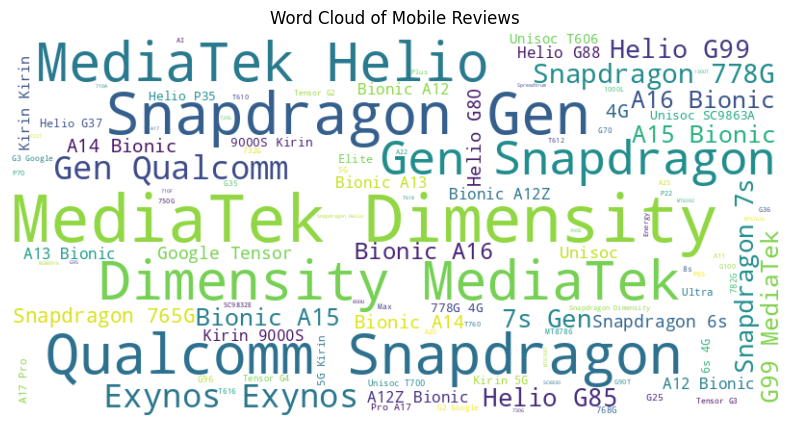

In [3]:
# Install necessary libraries
!pip install nltk textblob wordcloud

# Import modules
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv("Mobiles Dataset.csv", encoding='latin-1')  # Adjust path if needed

# Check available columns
print("Dataset Columns:", df.columns)

# Ensure the dataset has a relevant text column (e.g., 'Reviews' or 'User Feedback')
review_column = "Processor"  # Change if your dataset has a different name
if review_column not in df.columns:
    raise ValueError(f"Column '{review_column}' not found. Check dataset for review-related text.")

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["sentiment_score"] = df[review_column].astype(str).apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = df["sentiment_score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Display sentiment distribution
print("\nSentiment Distribution:\n", df["sentiment"].value_counts())

# Generate Word Cloud
text = " ".join(df[review_column].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Mobile Reviews")
plt.show()
